In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.evaluation.independent import sensitivity_n
from experiments.lib.util import get_ds_model, get_mask_range, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

# Initialization and parameters

In [2]:
BATCH_SIZE = 4
DATASET = "MNIST"
MODEL = "CNN"
METHOD = "InputXGradient"
N_PERTURBATIONS = 16

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, BATCH_SIZE, dataset.sample_shape[-2:],
                      aggregation_fn="avg", methods=[METHOD])
method = methods[METHOD]
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
mask_range = get_mask_range(DATASET)

# Run Sensitivity-n

In [3]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4)))
batch = batch.to(device)
labels = labels.to(device)
sens_n, debug_data = sensitivity_n(batch, labels, model, method,
                                    mask_range[1:], N_PERTURBATIONS, 0., debug_mode=True)

/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.7/site-packages/captum/attr/_utils/gradient.py:33: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index


# Plot results

## Plot the original samples and their attributions

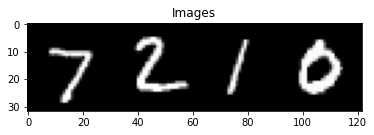

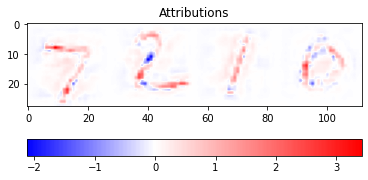

In [4]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

n: 25
[[662 751 702  76 457 479 741  51  94 672 489  79 708 135 241 618 711 602
  701 758 207 539 756 517 265]
 [701  95  63 480 744 383 741 545 632 126  57  64  49 120 716 279 106 496
  468 533 311 249 560 498 620]
 [233 183 148  35 500 547 142 175 118 430 484 773 426  63 375 368 472 430
  634 626 621 177  95 154 147]
 [711  94 516 384 659 129 368 567 372 561 216 364 507 572  31 137  13 628
  762 767 591 711 347 761 514]]


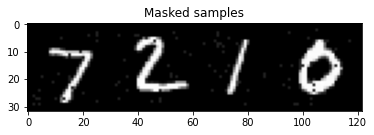

[[201 579  43 384 411 145 447  54 711 399 254 479 142 414 371 732  51  25
   85 771 196 486 423  18 413]
 [172 310 576 676 413 244 323 272  91 115 649 670 697  99 669 331 423 720
   72 779 210 332 588  45 155]
 [782 182  87 151 583 618 744 563 350 255 764 248 675 713 573 739 480 651
  147 715 662 612 642 132  98]
 [682 642 392 171 366 471   3 369 520 226 266 283 207 708  33 445 453 399
  732 732 500 710 646 779 507]]


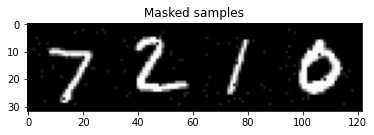


n: 50
[[594 119 722 356 418 692 406 702 115 550 141 224 204 613 568 441 305 169
  569 734  93 666 668 449 317 505 536 422 553 478 105 302 266 214  16 595
   49 336 699 110 200  44 727   5 336  47 372 238 273 360]
 [215  58 321 542 103  57 467 521 407 409 233 588 126 383 118 272 650 126
  733  82 395 205 143 179 272 763 163 649 398 232   0 125  71  92 539 205
  225 607  70 435 231 226 633 565 122 438 449 300 428 740]
 [ 11 344  90  96 777 513  33  93 707 619 704 173 431 345  39 738 438 556
  359 139 668  13 697  42 734 575 413 657 279 559 753 354 220 509 648  32
  470 614 328 270 134 509 263  80 513 738  86 190 381 402]
 [739 368 246 298 152  92 331 320 754 595 459 645 251 436 502 771 190  47
  502  28 608  29 158 393 433 154 624   7 136  23 470 773 203 453 358  13
   16 460  41 509 143 782 141  35 359 643 628 417 334 304]]


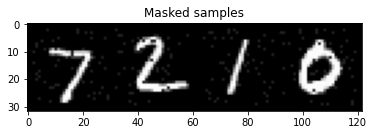

[[498 393 122 202   0 343 131  38 433 659  10 203  53 310 285 704 453 604
  533 579 279 299 675 371 172 264 658 558 525 326 302 129 570 248 591 137
  751 694 501 374 648 505 392 774 236 503  54 252 735 102]
 [567 681 117 708 383 775  29 507 198 416 588 278 661 225 620 761 509  82
  182 487 421 452 417  27 742 175 434 337 306 378 389  50 177 300 586 299
  265 526 146 103  46 559 312 212 150  53 112 505 749 166]
 [388 268 475 335  46 308 660 523 214 246 504 151 423 364 619 376  56 169
  350 410 738 390 106 670 745 430 557 439 240 293 691  10 702 190 298 607
   88 693 426 288 187 659 124 398  14 245 359 674 298 168]
 [655  85 759 735 720 153 111 358 199  95 321 165 594  89 111 177 585 457
  781 212 522 398   1 320 598  47 154 782  46 546 569 737 330 589 691 101
  226 512 278 516 441 692 723 327 184 642 259 327 552 447]]


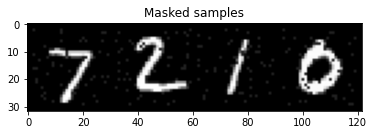


n: 75
[[ 55 706  80 343 731 780 744 142 161 239 206 353 285 200 255 323  21 234
  600 379 513 188 203 729 384 618 114 589 472 704 531 697 339   6 386 427
  196 545 383 655 733 734 586 583 374 545 567 614 739 605 319 565 555 634
  251 546 400 677 429 269 132 333 546  26 433 517 179 336 704 274 301 243
  351 382  94]
 [249 393 741 635 213 700 427 323 477  88 175 123 111 510 634 227 395  12
  143 196 233 582 305 244  48 552 694 689 495 620 535 622  84 626 249 120
  758  96 497 463 322 115  26  73 689 187  42 458 178  31 740 605 168 177
  622 349 310 123 542 194  75 302 321  77 362 446 296 364 584 405 523 433
  692 551 304]
 [312 513 173 737 574 327 541 352 439 634 587 269 317 646 195 609 154 476
  587 624 317 409  87 252 146 426 441 645 632 503 753 681 387 576 653 762
  555 552 285 687 757 724 432 235 399 295 492 552 513 701 414 276 521 705
  761 584 701 265 506 347  10 140 116  59   8  83 256 569 358 527 555 691
   27 597  56]
 [236  77 623 499 551 567 129 575  40 590 627 484 334 739 16

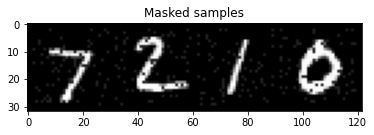

[[220 558 383 720 421 608 262 219 574 464 709 132 386 682 317   0 771 144
  470 144 389 402 293 693 753 478 218 752 586 370 175 352 111 598 741  97
  244 514 465 161 208 265 452 739  76 694 644 215 542 285 351 732  75 755
  606 354 746 497  37 293 743 485 760 692 390 214 674 263 478 303 241 512
  356 152 769]
 [782 196 403 613 273 644 318 724  72 739 294  44   1  83 395 190 334 709
  402 590 298 155 121 328 449 572 612 626 382 377 745  37  23 694 780 536
  477 692 500 249 388 220 372 256 625 539 541 217 573 542 768 594  59 392
  297 643 237 450 314 286  76 766  24 659 337 578 551 299  72 762 484 502
  783 179 333]
 [347 153 301 629 402 365 636 582 757 223  31 489 609 744 650 431  49  83
  155 774 716 261 618 759 284 454 234 579  44 760 726 418 235 298 240 153
  111 131 253 606 576 474 171  74 673 234 270 264 699 264  18 133 564 256
   71 111 405 493 649 326 131 739 209 462  50  36 521  57 473  64 405 183
  419 257 147]
 [370 101 199 213 755 455 573 412 243 323 721 429 616 645 223 438 4

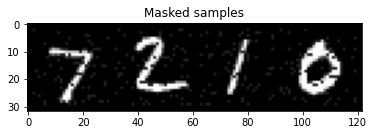


n: 100
[[443 430 208 653 386 705 525 700 447 420 116  95 667 179 477 401  81 462
   12  78 101 114 192  21 687 617  44 197 108 585 118 560 191 523 587 590
  502 358 290 438 782 271 305 728 484 613 330 583 535 656 368 581 187 546
  209 768 249 695 445 629   4  16 525 592  88 256 533   1 176  49  88 306
  553   1 201 134  81 757  14  22 313 424 614 260  62 490 343 243 304  56
    8 432 520  50 468 298 306 376 192  26]
 [604 184 167 262 551 451 291 627 647 656  12 663 712  15 692 161  51 713
  223  93 421 608 215 183  42  83 555  96  10 283 152 167 753  21 552 401
  686  77 628 495 413 567 242 532 312 696 632 281 338 205 265 256 640 266
    1 246 193 179 315 540 268 319  60 248 712 386 506 308 270 519 527 378
  606 623 456 229 317 762  94  81  90 120 243 204 521 638 473 259  94 110
  771 605 387 319 518 239  41 300 413 440]
 [700 592  88 473 660 127 356 353 674 760 497 424 145 666 457 586 688 107
  142  82  96 583 391 565 186  60 615 237 608  50 714 331 134 297 517 699
  699  23 273 648 

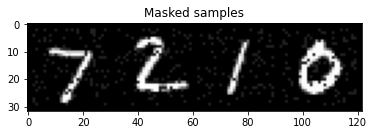

[[768 731 489 435 480 564 446 334 214 289 534  70 765 585 573 182 302 547
  570 346 689 179 609  34 149 313 427 355 628 288 479  29 574 360 186 430
    6 198 538 119 590 568 529 547 132 252 367 584 170 719 508  81 220 583
  513 291 777 232 135 408 458 604 302   6 363 416 592 122 153 389 715 513
  334 268 213 278 119 298 428 324 154 401 464 659 183 757 544 452 244 528
  178 352 644 340 556 645 549  75 697 560]
 [636 454 170 478 773 474 557 773 741 535 576 742 185 577 464 254 680 210
  403 506 770  16 310 412 643 386 366 160 496 511 196 274 482 460  13  77
  487 292 220 538 722 779 161 451 331 152 634 587 589 347 673  87 600 108
  424 143 185 653 514 403  36 467 124 380 364 755  71 252 458 724 313  50
   69 466 687  53 598 370  98 542 713 278 235 684 185 365 487 375 362 280
  562   5 466 243 632 686 425  78  47 249]
 [118 540 605 751 474 356 670 252 639 709 421 306 213 447 326 406 487 754
  728 315 616 414 458 153 144 423   0 219 492 539 274 541 389 626 113 738
  523 279 394 485  75  64 

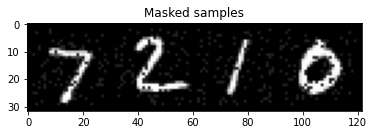


n: 125
[[386 262 157 614 341 336 338 358 438 644 258 251  29 420 752 166 778 414
  552 541 153 115 583 254 186  45 417 463  82 140 106 433 147 298 105 419
  464  33 102  41 694 189 604 290 712 315 723 126 495 647  80 597  91  82
  142 666  13 648 752  26  19 507 628 545 319 293 424 612 571 757 687 171
  697 505 586 728 473 586 307 435 533 690 256 554 692 762 661  48 431 173
   44 591 432 168 632 422 604 259 349 436 448 225 528 114 185 256 110 591
  224 122 313 371 665  41 411 189 267 341 401 548  10 401 345 696   2]
 [677  34 465 700 318 106 484 773 304 706 386 497  47 244 559 123 642 253
   64 631 747 332 498 102 526 763 686 612   9 723 107 110  95 757  94 409
  340  73 379 264 413 116 127 226 378 408 725 232 372 355 760 343 327 230
   47 693 306 600 230  15 206 657  62  89 419 744 322 746 219 600 251 536
   12 650 118 411 511 244 384 513 311 512 568 276 164 735 579  93 335 711
  743 196 620 394 419 540 743 351  27 477 603  92 184 278 638 349 327 182
  114 528 617 470  45 570 273 633

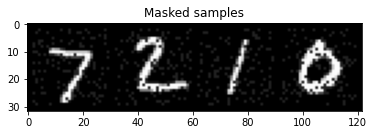

[[228 368 706 100 461  93 544 753 564 766 240  67 747 122 308 202 464 378
  413 124 385 176 408 463  35 418 410 649  56 628 211 347 631 658 129 201
  783 521 123 447 531 690 139 628 123  15 239 293 234  73  82 644  44 566
  710 735 762 407 346 254 499 374 539 249 224 230 117 564 155  44 590 747
  172 257 679 247  71 603 472 239 607 560  51 192 753 155 391 757 491 663
  168   1 532 630 414 600 511 268 398 346 348 618 482 263 267 432 395 542
  579 413 488 698  92 180 148 522 515 735 767 623 268 300 735 773 442]
 [596 523  26  69 678 391 426 560 115 324 469 374  49 520 560  99 535 127
  294 527 482  82 633 241  86   7 167 404  59 458   5 219 746 156 231 115
   65 467 465  60 420 300 312 734 696  90 546  22  28 551 507 759 432 168
  126 189 720  38 496 573 117 383 664 558 671 316 260 508 631   9 267 613
  225 473 124 325 276 258 723 668 403  93 683 276 276 613 739 677 253 640
  718  24  32 635 312 765 211 681 150 416 138 346  44 581 108 574 661 363
  496 718 718 148 231 724 755 230 423 477

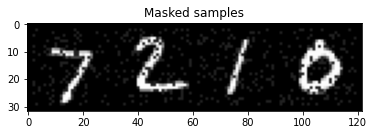


n: 150
[[614 403 710 478 232 646 717 524 385 290 502 207 548  93 346 549  93 506
   69 408 193 665 731 340  27 243 179 754 663 314 444 442 108 158 669 101
  696 345  79  55 719 760 381 190 607 719 349 538 669 427 470 453 111 650
  127 685 210 363 187 682 665 160 686  60   7  78 341  28 731  76 350 137
  416 231 425 495 218 399  38 394 324 519 234 281 121 696 230 653 689 264
  172 195 691 369 417 259 291  36 704  49 659 156 321 131 528 506 388  90
   85 200 770 498 193 375 104 718  71 252  99 422 279 221 739 367 380 136
  751 565  95 763 782 772 174 454   6 491 675 218  80 270 418 696 424 539
   55 354 573 716 187 529]
 [203 507 119 304 648 643 187 752 481 462 467 215 566 415  96  23 689 423
  241 666 104 721 272 176 669 271 498 484 478 226 125 162 331 331 766 574
  149 518 290 131 204 321 570 300  45 695 384 313 345 590 636 269 558 569
  317 583 722 383 491 117 308 258 180 114  97  86 352 534 478 763  30 147
  256 706 775 372 151 495 429 378 121  26 573  59 136 458 723 486  67 416
  6

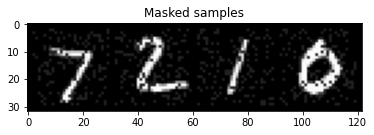

[[539 608 638 344 261 310 563  62  36  30 533 731 204 345 512  89 236 653
  490 584 306 658 382   4 128 157  79 492 275 242 731  43 622  63 736   4
   64 349 300 732 134  57 131 301 593 773  41 397 200 430 703 686 768  49
  739 663 601 534  20 438 367  71 571 292 303 278 121 609 339  10 575 653
  494 614 735 312 372 368 545 503 590 770 185 607 728 211 398 773 312 745
  716 272 649 219  37 543 403 545 349 610 716 163 448 599 472 130  64 748
  214 603 442 583 399 203 603 608 646 517 358  87 715 646 369 124 613 642
  150 280 533 127 279 389 678 290  85 535 436 613 557 167 246 747  42 757
  615 713 158 369 596 126]
 [631 315 259 242 522 665 561 362 387 472  94 645 168 468 729 705 527 325
  522 379 478 532  73 450 528  24 726   9 568 498 196 532  56 616  45   8
  212  49 666 340 188 462 523 370 270 701 675 191  80 277 609 769  86 342
   82 584  65 423 690 233 710  95  13 506  55 482  52 760 438 657  14 246
  520 601 353 493 128   1 661 649 760 643 569   0 253 416 630 205  89  88
   89 240 7

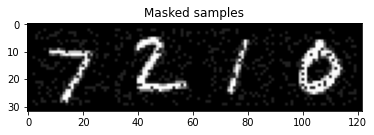


n: 175
[[755 336 210 167 316 179 696 361 361 379 514 532 446  76 308 377 653  60
  623 776  64 140 577 266 208 529 345 487 431 726 726 104 429 587 279  81
   60 127 189 479 230  67 654 246 330 442 600 336 112 398 213 611 235 689
  763 484 766 288 550 320 565 156 334 545 772 463 708 620 329 782 432 749
  457 616 675 715  75 651 127 590  54 267 257 435 429 744 228 519 344 687
  619 371 462 648 519 198 412 761 676 162 514 382 425 103  10 223 157  25
   55 518 404 755 303 298 363 573 190 394 586 485 232 114 625 272 315 742
  617 168 582 721  57 280  46 140 511 454 595 688 336  68 306 765 243 338
  474 595  31 538 255 216 583 609 609 413 238 236 667 129 276 483 285 722
   86 454 365 126 631 255 154 620  58 727  88 274   4]
 [115 657 618 472 176 769  81 564 773  71 712 412 721  49 675   6  34 225
  598 254  22 182 496 453 213  49 291 277 581 163 116 299 341 256 447 481
  707 293 333 214 130 662 583  95 655 603 141 458 530 444  37 270 331 603
  470 324 208 618 652 110 296 656 134 574 322 691

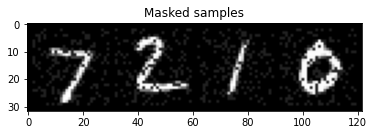

[[ 97 414 323 308  70 616 746 652 431 521 572 413 201  57   2 686 173 576
  131 454 362 764  64 471 604 511 750 195 725 644 749 733 150  55 298 547
  438 544 472 165 650  50 445 724 487 679 221 616 200 412 233 298 554 519
  766 315 699 410  15 235  30  53  30 780 650 447 645 102 682  36 675 105
  446 129 737 617 615  36 761 351  48 256 253 640 126 654 425 197 342 662
  698 661 346 320 287  83 690 605  95 188 224 231 678 350  68 390 193 741
  601 597 214 539 307 430 233 775 477 683 620 440 567 598 326 494  76 386
  393 721 166 489  39  64 750 586 578 106 363 330  38 290 745 695 576 285
  222  59 420 522 179 171 761 403 765 500  44 485 216 661 326  73 718  61
  724 665 326 683 506  74 460 175 493 308 213  13 155]
 [329 727  12 102  66 478 562 517 606 141  40 408 490 692 494 727 105 697
   91  49 373 250 257 187 350 719 768 222 172 375   9 155  78 182 635 758
  379 473 706 462 101 562 281 719 533 526  90 757 370 466 597 302 339 564
  246 726 765 529 750 753 532 205 309 681 451 349 200 689

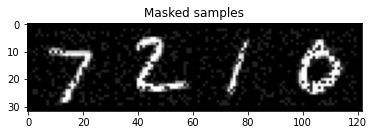


n: 200
[[549  13 188 585 397  75 506 424 259 406 583 600 544  10 447 680 728 246
  314 509  44 470 406 321 210 339 205 144 687 418 557 453 631  12 348 447
  664 419 137 356 338 160 364 186 731 558 664 237 194 219 645 341 146  76
  351 394 706 777 367 573 171 388 539 268 125 587 379 181 559 388   1 100
   56 470   7 703  13 528 145 631  36 467 322 238 202 252 314 261 250 679
   13 735  71 595 340  97 214 176  28 765 631 484 390 625 365 434 441 455
   57 113 504 601 268 667 556 664  57  35 729 238 557 408 614 776  66 617
  673 242 731 384 222 388 577 529 735 539 737 716 477 362 510 404 629 431
  664 550 233 676 704 250 693 610  61 638 614 108 275  70 550   8  77 320
  637 446  98 196  62 614 609 206 323 202 319 684 587 522 773 297 516 712
  130 394 180 357 741 661  60 195  49 454  78 778 670 519 312   7 574 683
  290 755]
 [238 414 160 185 461 661 587 667 696 235 668 624  12  53 474 380 578   3
  702 674 197 604 575 444 392 357 279 298 513 356 503 124  50 515 129 165
  518 392 166 111 6

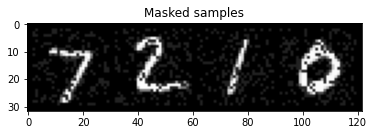

[[331 417 337  24 216 569 140 721 666 353  79 472 116  72 573 728  21 178
  395 442 415 253 576 450  43 704 232 364 727 262 651 433 207 258 742 453
  746 323 112 492 599 489 450 635 677  14 502 513 168 616 319 297  98 404
  284 206 431 199  61 706 186 779 392 499 295 290 223 624 300 585 676 636
  302 104 582 298 712 424 327 714  30 427 321 676 445 266 370 319 722 359
  510 677 378  97 576 514 130 711 559 694 757 565 262 238 417 585 481 516
  714  24 721 610 585 322 606 781 402 770 487 471 621 604 245 278 231 717
   75 573  36 516 742 158 516 489 376  14 129 530 542 610 475 683 599 531
  702 137 568 206 699  77 274  44 417 652 100 352 688 498 701 596 213 554
  519 680 431 379 725 157 368 551 534 220 329 652 535 176 206 515  20 212
  301 688 591 290 667 710 694 455 207 503 175 434 543 740  21 144 264 650
  108 430]
 [107  89 153 130 607 338 365 710 125 608 509  43 251 105  94 468 168 206
  245 563 259 347 624 390  96 450 362 232 543 669  22 421 474 435 667 759
  352 588 619 350  45 712 5

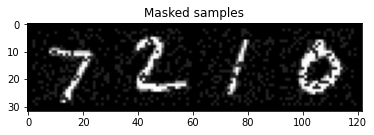


n: 225
[[242  40 607 672 700 683 705 512 746 626 119 105 383 696 589 568 660 230
   81 707 378 429 574 200 478 213 186 144 715 257 259 286  52 435 365 361
  666 703 554 447 294 378 632 415 392 308 555 679 665 509 677 406 746 279
  308 731 639  15 238 284 175 286 645 754 478 298 540 521 140 748 461 673
   20 321 537 167 712 215 116 727 213 238 458 425 475  51 560 395 623 601
  317 446 240 394 732 282 706 171 512 137 141 383 341 316 573 190 708 205
  318 558 319 110 167 212  26 668 159 278 325 619 599 618 524  48  11 530
  561 779  29 323 749 242 664 109 320 215 220 511  66 657 524 722 365 755
  269 164 557 571 329 502 510 783 762 221 619 565 704 586 263 189 577 209
  101 613 148 526 595 355 731  90 460 682 674 422  43 599 447 187 490 138
   85  64 327 733 127 266 234 367  76 611 754 764 119  96  87 481 386 630
  208 105 628  79 100  70  36 137 750 223 293 279 642 610 661 308 225 300
  243 432 553 127  54 292 267 332 489]
 [ 25 119 231 676 751  84 633  58 442 699 710 688  11 240 735 379

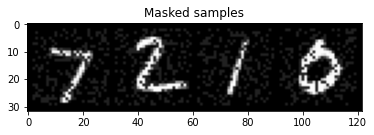

[[659 435 670 654  34 171 103 777 330 561 348 512 364 670 241 389 163 109
  358 395  87 646 517  59 780 590 365 665 725 356 284 485 180 544 756  98
  235 363 243 667 654 248 190  40 137 328 543 459 329 461 677 129 553 290
  223  22  31  73 270 101 655 781 187 514 764 666 317 128 541 269 108 326
  453 486 456 341 214 732 279 700 153  30 240 110 706 383 465 684 103 428
  121 423 615 324 133 481  80 529 223 615 612 414 182 483  29 516 724 174
   65 129 782 327 702 463 385 636  80 503 288 523 568 285 319 203 284 365
  738 475 310 385 537 462 347 324  59 769 158 120  11 455 667 155  58 201
  355 538 737 744 512   2  81 679 377 558 618 349 158 457 638  72 156 672
  175 507 380 602 482 699 292 294 474 176 180 390 435 435 761 596 761 592
  249  42 142   7 317 702  67 263 477 610 134 483 509  86 271 109 527 365
  244 344 361 656 127 491 537 225 304 245 470  21 205 724 436 650 179 316
  637  39 204  42 529 326 424 245 290]
 [511 659 301 774  55 700  19 273 576 644 772 406  87 558 765 270 343 731

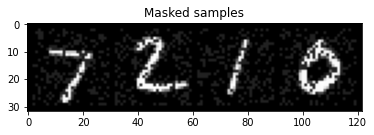


n: 250
[[367 563 193 433 562  91 318 397 537 700 697 626  44 376 350 529 412   4
  285  28 476 318 711 496 305 639 165 440 748 594 459 480 111 246 131 651
  126 717 241  85 290 196  73 481 570 481 295 364 278 274 681 441 286 628
  302 262 134 306 265 760 328 319 542 510 237 538 179 620 119 273 681 182
  628 545 721  84  67 362 358  33  26 611 129  59 775 563 583 465 198 431
  534  20 126 257 634 357 417 780 262 158 649 694 645 410 495 719 475 250
  359 545 281 539 495 695 570 155 482 164 337 340 231 544 702 426 775 382
  702 347 104 262 542 180 323 281 322 244 334 281 400 133 599 729 574 750
  468 110 249 728 415 104 702 530 217  25 461 603 111  60 373 428 666 152
   37 172 198 246  94 541 148 498 490 278 655 465 736 277 440 537 602  50
  725 580 522 440 347 408 552 156 316 591 416 614 419 260 354  44 192 420
   56 206 639 186 171 576 639 504 697 204 378 749 331  99 424 565  82 391
  191 750 377  36  93 717 672 412 131 202 367 419 313 218 366 575 377 459
  289 689 162 541 527 238 150 

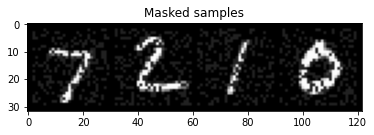

[[ 87 605 209 648 608 339 663  81 338 120 390 253 498 239 180  78 157 342
  166 731  30 783 574 182 465 146 300 413 668 399 440 170 261 567  46 478
  369 127  35 695 536 206 719  90 606 250 513 400 718 264 184 435 383  16
  281 335  32 776 716 709 260 553 750  73 266 694 622  45 569 187 740  25
  670  36  26  83 376 495 279 559 334 311 292 306 222 759  70 262 485 198
  319 564 231 126  14 373 174  11 752 295 520 148 584  19 766  38 389 268
  297   5 661 581 260 757 310 403  13  70 326 338 162  36 101 198 189  52
  417 319 471 249 483 394 678  85 720 517 522  54 490 180 229  16   8  16
  738 752 504 196 154 255  18 539 379 217 651 588  79  93 256 474 397 672
  114 409 779  65 145 135 432 456 481 650  25 530  54 699 781 476 600 613
  672 398 514 341 120 229 378  29 376 148  66 655 541 382 631 729  85 538
  535 487 610 612 180 353 256 398 305  12 588 631 563 473 612 546 635 537
  349  72 172 358 760 151 289 742 405  94 698 187 328 723 297 316 484 320
  386 115 100 606 543 671 390 548  18 

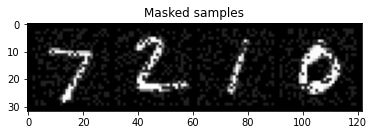


n: 275
[[570 473 658 ... 620 264 238]
 [409 368 342 ... 654 391 636]
 [282 576 697 ... 325 767 576]
 [536 780 432 ... 252  76 557]]


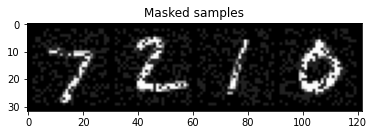

[[199 483  15 ... 165 762 553]
 [157  93   0 ... 533 633 338]
 [273 299  68 ... 474 327 746]
 [315 341 775 ...  40 449 519]]


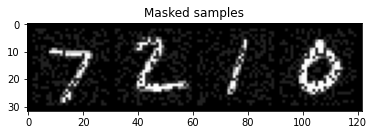


n: 300
[[513 782 663 ... 346 132 200]
 [724 231 640 ... 589 607 107]
 [ 12 521 697 ...  35 497 157]
 [290 588 233 ... 592 558 252]]


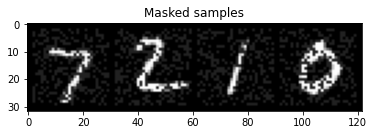

[[571  66 473 ... 590  18 554]
 [449  43  84 ... 722 466 155]
 [684 332 382 ... 405 121  82]
 [181 714 125 ... 452 303 125]]


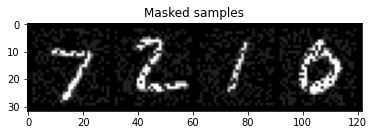


n: 325
[[107 161 531 ... 551 746 571]
 [464 134 269 ... 649 395 750]
 [183 436  48 ... 377 431 667]
 [154 670 100 ... 422 162 174]]


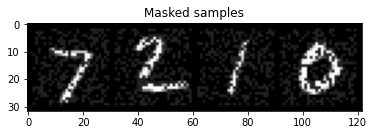

[[152 427 726 ... 140 331 613]
 [487 728 186 ...  98 668 563]
 [  0 749 411 ...  35 118 373]
 [486 691 520 ...  96 561 112]]


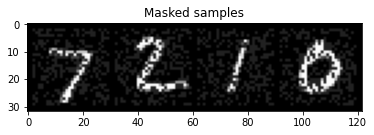


n: 350
[[657  32 223 ... 527 761 157]
 [693 635 309 ... 408 659 349]
 [202 525  30 ... 253 465 591]
 [712 267 432 ... 526 687 279]]


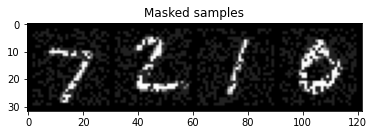

[[739 256 449 ... 707 209 144]
 [750 260 528 ... 242 521  49]
 [  7 769 620 ... 747 507 129]
 [722 441 681 ... 647 736 643]]


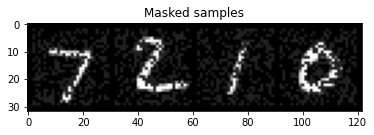


n: 375
[[ 42 121 712 ... 368 371 605]
 [466 544 346 ... 485 522 433]
 [764 727  15 ... 573 103 696]
 [277 398 297 ... 309  79 475]]


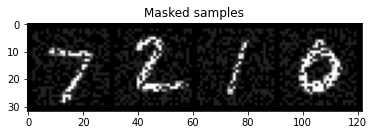

[[ 76 516 361 ... 400 395 581]
 [642  61  54 ... 538 101 409]
 [345 152 540 ... 406 134  16]
 [548 557 724 ... 530 117 640]]


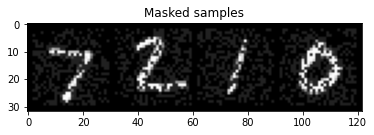

In [6]:
for n_idx, n_data in enumerate(debug_data["pert_data"]):
    print(f"n: {mask_range[n_idx+1]}")
    for pert_idx in range(2):
        print(n_data["indices"][pert_idx].cpu().numpy())
        masked = n_data["masked_samples"][pert_idx]
        imshow(dataset.denormalize(masked), title="Masked samples")
    print()